In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

path = '/content/drive/MyDrive/lotte/'

customers = pd.read_csv(path + 'LPOINT_BIG_COMP_01_DEMO.csv')
record = pd.read_csv(path + 'LPOINT_BIG_COMP_02_PDDE.csv')
recordP = pd.read_csv(path + 'LPOINT_BIG_COMP_03_COP_U.csv')
products = pd.read_csv(path + 'LPOINT_BIG_COMP_04_PD_CLAC.csv')
stores = pd.read_csv(path + 'LPOINT_BIG_COMP_05_BR.csv')
recordL = pd.read_csv(path + 'LPOINT_BIG_COMP_06_LPAY.csv')
record.head()

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1


In [86]:
print('손님이 1번만 구매한 경우 :', sum(record['cust'].value_counts() == 1))
print('손님이 5번이상 구매한 경우 :', sum(record['cust'].value_counts() > 4))

손님이 1번만 구매한 경우 : 0
손님이 5번이상 구매한 경우 : 24452


In [85]:
custs = record['cust'].value_counts() > 4
record['custs'] = record.apply(lambda x : custs[x['cust']], axis = 1)
record = record[record['custs'] == True]

In [92]:
print('상품이 1번만 팔린 경우 :', sum(record['pd_c'].value_counts() <= 3))
print('상품이 3번이상 팔린 경우 :', sum(record['pd_c'].value_counts() > 3))

상품이 1번만 팔린 경우 : 81
상품이 3번이상 팔린 경우 : 1852


In [93]:
pds = record['pd_c'].value_counts() > 3
record['pds'] = record.apply(lambda x : pds[x['pd_c']], axis = 1)
record = record[record['pds'] == True]

In [94]:
tem = record.groupby(['pd_c'])['buy_am'].median()
tem

pd_c
PD0001    1510000.0
PD0002      19350.0
PD0003      64900.0
PD0004      25900.0
PD0005     220000.0
            ...    
PD1929     120000.0
PD1930     136000.0
PD1931     134000.0
PD1932     220000.0
PD1933      47750.0
Name: buy_am, Length: 1852, dtype: float64

In [95]:
def fun(x1, x2):
    if x2 >= tem[x1]:
        return x1 + '1'
    else:
        return x1 + '2'


record['buy'] = record.apply(lambda x : fun(x['pd_c'], x['buy_am']), axis = 1)

record.head()

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,buy,custs,pds
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1,PD02902,True,True
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1,PD13691,True,True
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,PD02902,True,True
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,PD02902,True,True
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1,PD02902,True,True


In [96]:
tem = pd.pivot_table(record, index = 'cust', columns = 'buy', values = 'buy_ct', aggfunc = 'sum')
tem.fillna(0, inplace = True)
tem.head()

buy,PD00011,PD00012,PD00021,PD00022,PD00031,PD00032,PD00041,PD00042,PD00051,PD00052,...,PD19291,PD19292,PD19301,PD19302,PD19311,PD19312,PD19321,PD19322,PD19331,PD19332
cust,,,,,,,,,,,,,,,,,,,,,
M000034966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
M000136117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
M000201112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
M000225114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
M000261625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
# tem = pd.pivot_table(record, index = 'cust', columns = 'pd_c', values = 'buy_ct', aggfunc = 'sum')
# tem.fillna(0, inplace = True)
# tem.head()

In [105]:
import torch
import torchvision
from torchvision import transforms
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Dataset
 
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [106]:
class CustomDataset(Dataset):

    def __init__(self, x):
        self.xx = x.copy().values.astype(np.float32)

    def __len__(self):
        # 길이 출력
        return len(self.xx)

    def __getitem__(self, idx):
        # 특정 1개 샘플 가져오는 곳
        return self.xx[idx]

In [130]:
datas = CustomDataset(tem)
dataL = DataLoader(datas, batch_size = 32)

In [131]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(3689, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512,64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Linear(64,10),
            nn.BatchNorm1d(10),
            nn.ReLU()
        )
    
        self.decoder = nn.Sequential(
            nn.Linear(10,64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Linear(64,512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512, 3689), #처음 입력된 크기와 같은 크기로 나와야 한다 
            #nn.Sigmoid()
        )
    
  #인코더와 디코더 연산을 차례대로 수행하도록 설정 
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded, encoded

In [132]:
model = Autoencoder().to(device)
critertion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

In [137]:
for epoch in range(3):
    running_loss = 0
    for data in dataL:
        inputs = data.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)[0]#.view(-1, 3820)) #이미지를 일렬로 펴서 넣기 
        #outputs = outputs.view(-1, 1, 28, 28) #나온 이미지를 다시 정가각형 형태로 변환 
        loss = critertion(inputs, outputs)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    cost = running_loss / len(dataL)
    print('[%d] loss : %.3f' %(epoch +1, cost))

[1] loss : 1.386
[2] loss : 1.320
[3] loss : 1.295


In [138]:
with torch.no_grad():
    temT = torch.from_numpy(tem.to_numpy()).float()
    decoders, encoders = model(temT)
    encoders

In [140]:
summarys = pd.DataFrame(encoders.numpy())
summarys.head(10)

,0,1,2,3,4,5,6,7,8,9
0,0.066519,0.000000,0.356405,0.348413,0.378775,0.161943,0.000000,0.394072,0.000000,0.439278
1,0.393653,0.000000,0.545904,0.080162,0.434730,0.070945,0.000000,0.544338,0.000000,0.891509
2,0.000000,0.000000,0.425632,0.352897,0.453015,0.072443,0.000000,0.483874,0.000000,0.564570
3,0.502639,0.309956,0.168206,0.077953,0.222874,0.143294,0.174050,0.319359,0.000000,0.226312
4,0.303766,0.000000,0.519267,0.188907,0.434975,0.038327,0.000000,0.556004,0.000000,0.842963
5,0.138243,0.000000,0.572785,0.273825,0.502127,0.050389,0.000000,0.523757,0.000000,0.845602
6,0.558749,0.000000,0.449766,0.029995,0.339525,0.049820,0.000000,0.465530,0.000000,0.795272
7,0.553820,0.323354,0.000000,0.000000,0.000000,0.000000,0.753392,0.000000,0.096668,0.000000
8,0.000000,1.691612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.122714,0.000000
9,0.105250,0.000000,0.510633,0.288915,0.486711,0.050691,0.000000,0.544743,0.000000,0.775296


In [141]:
summarys.shape

(24452, 10)

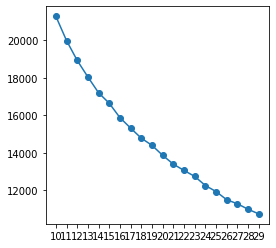

In [144]:
from sklearn.cluster import KMeans
# 적절한 군집수 찾기
# Inertia(군집 내 거리제곱합의 합) value (적정 군집수)

ks = range(10,30,1)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(summarys)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(4, 4))

plt.plot(ks, inertias, '-o')
plt.xticks(ks)
plt.show()

In [150]:
clust_model = KMeans(n_clusters = 10)
clust_model.fit(summarys)
pred = clust_model.predict(summarys)
pred[:10]

array([0, 0, 0, 1, 0, 0, 0, 1, 5, 0], dtype=int32)

In [151]:
tem['pred'] = pred
tem['pred'].value_counts()

0    12122
1     5823
6     3960
9     1162
8      589
5      367
2      263
7      126
4       37
3        3
Name: pred, dtype: int64

In [205]:
def recommend(names):
    lists = tem.loc[[names]]
    pred = lists['pred']
    while (True):
        randoms = tem[tem['pred'] == int(pred)].sample(n = 1)
        randoms = randoms.T
        samples = (randoms[randoms.iloc[:,0] > 0].sample(n = 1).index)[0]
        #samples = int(samples)
        if int(lists[samples]) == 0:
            results = samples
            break
    
    return results
    
recommend('M000225114')

'PD11552'